<div style="text-align: right"><sub>This notebook is distributed under the <a href="https://creativecommons.org/licenses/by-sa/3.0/" target="_blank">Attribution-ShareAlike 3.0 International (CC BY-SA 3.0) license</a>.</sub></div>
<h1>Curs d'Òptica en Python <span style="font-size:10px;"> <i>Jupyter notbooks collection by <a href="https://webgrec.ub.edu/webpages/000004/cat/dmaluenda.ub.edu.html" target="_blank">David Maluenda</a></i></span></h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a href="https://campusvirtual.ub.edu/my" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/ub_logo-01.png" width="130"/>
    </a>
  </td>
  <td>
     &#160 &#160 &#160 &#160 &#160
  </td>
  <td>   <!-- gColab -->
    <a href="https://colab.research.google.com/github/opticaUB/material_classe/blob/main/31_Coherencia.ipynb" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/colab_logo_32px.png" />
      Run in Google Colab
    </a>
  </td>
  <td>
     &#160 &#160 &#160 &#160 &#160
  </td>
  <td>   <!-- github -->
    <a href="https://github.com/opticaUB/material_classe/blob/main/31_Coherencia.ipynb" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/github_logo_32px.png" />
      View source on GitHub
    </a>
  </td>
  <td>
      &#160 &#160 &#160 &#160 &#160
  </td>
  <td>   <!-- download -->
    <a href="https://raw.githubusercontent.com/opticaUB/material_classe/main/31_Coherencia.ipynb"  target="_blank"
          download="02_Training">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/download_logo_32px.png" />
      Download notebook
      </a>
  </td>
</table>

## 3. Fenòmen d'interferència

### 3.1 Coherencia


In [4]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact

ModuleNotFoundError: No module named 'ipywidgets'

In [5]:
# Parameters
wavelen_center = 550  # nm
wavelen_sigma = 50 # nm

# Constants
wavelen_N = 1000   # Number of points
wavelen_min = 400  # nm
wavelen_max = 700  # nm

# position_N = 5000  # Number of points (different than wavelen_N just to avoid errors)
position_min = -15e3  # nm
position_max = 15e3  # nm


# Variables
wavelen_full = np.random.rand(wavelen_N) * (wavelen_max - wavelen_min) + wavelen_min
wavelen_min_sigma = wavelen_center - wavelen_sigma * 3
wavelen_max_sigma = wavelen_center + wavelen_sigma * 3
wavelen_reduced = np.random.rand(wavelen_N) * (wavelen_max_sigma - wavelen_min_sigma) + wavelen_min_sigma
position = np.arange(position_min, position_max, wavelen_center/4)  # nm

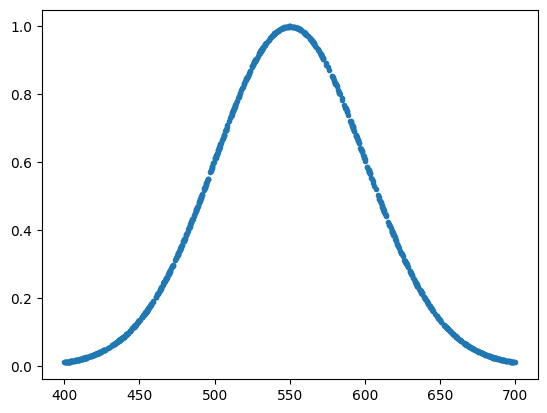

In [6]:
# Spectrum
get_spectrum = lambda l: np.exp(-((l - wavelen_center) ** 2) / (2 * wavelen_sigma ** 2))
spectrum_full = get_spectrum(wavelen_full)

plt.plot(wavelen_full, spectrum_full, '.')

In [7]:
# Wave packets
wavenumber = 2 * np.pi / wavelen_reduced  # nm^-1
amplitudes = np.sqrt(get_spectrum(wavelen_reduced))
rand_phase = np.random.rand(wavelen_N) * 2 * np.pi

field = np.zeros_like(position, dtype=complex)
for i in range(wavelen_N):
    field += amplitudes[i] * np.exp(1j * wavenumber[i] * position + 1j*rand_phase[i])

field = np.real(field)/np.max(np.real(field))
I0 = (field**2).mean()

In [8]:
def plot_over(x_0=0):
    new_field = np.roll(field, -int(x_0))
    
    inter = ((field + new_field)**2).mean()
    print(f"{inter/I0:.4f}")
    
    plt.figure(figsize=(10,5))
    plt.plot(position[:-20]*1e-3, field[:-20])
    plt.plot(position[:-20]*1e-3, new_field[:-20], 'r-', label='Desplaçada')
    plt.xlabel('Posició (um)')
    
    # ax2.bar([0], [inter], width=0.5, color='blue')
    # plt.show()

interact(plot_over, x_0=(0, 200, 1))

NameError: name 'interact' is not defined

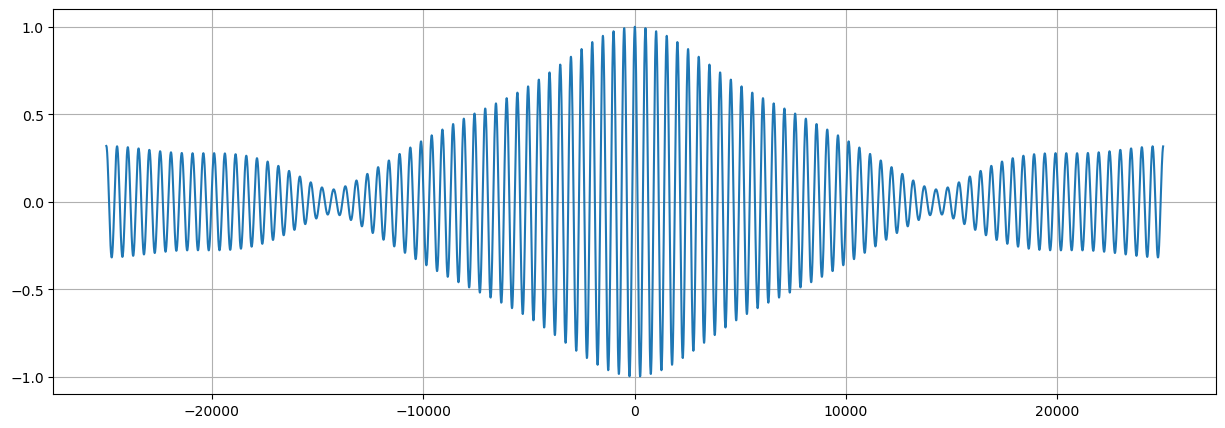

In [180]:

field_FFT = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(field)))

autocorr = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(field_FFT * np.conj(field_FFT))))

plt.figure(figsize=(15,5))
autocorr_real = np.real(autocorr)
plt.plot(position, autocorr_real/np.max(autocorr_real), label='Autocorrelació')
plt.ylim(-1.1, 1.1)
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.grid()